# Scenario Discovery with CART on 2D Barbell (λ = 0.05)

## Imports

In [1]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import cart
from src.load_shapes import load_shape_dataset
from E_hhcart_d_vs_established_methods_on_synthetic_data.visualisation_prim_cart_pca_prim.box_plotter import plot_boxes

## Load and Show Benchmark Problem

 We load the 2D Barbell benchmark problem with boundary noise λ = 0.05.

In [2]:
# Load and unpack a specific dataset
dataset_name = "barbell_2d_label_noise_005"
X, y = load_shape_dataset(folder_name="shapes")[dataset_name]


Loaded 32 paired datasets: ['barbell_2d_label_noise_000', 'barbell_3d_label_noise_000', 'radial_segment_2d_label_noise_000', 'radial_segment_3d_label_noise_000', 'rectangle_2d_label_noise_000', 'saddle_3d_label_noise_000', 'sine_wave_2d_label_noise_000', 'star_2d_label_noise_000', 'barbell_2d_label_noise_003', 'barbell_3d_label_noise_003', 'radial_segment_2d_label_noise_003', 'radial_segment_3d_label_noise_003', 'rectangle_2d_label_noise_003', 'saddle_3d_label_noise_003', 'sine_wave_2d_label_noise_003', 'star_2d_label_noise_003', 'barbell_2d_label_noise_005', 'barbell_3d_label_noise_005', 'radial_segment_2d_label_noise_005', 'radial_segment_3d_label_noise_005', 'rectangle_2d_label_noise_005', 'saddle_3d_label_noise_005', 'sine_wave_2d_label_noise_005', 'star_2d_label_noise_005', 'barbell_2d_label_noise_007', 'barbell_3d_label_noise_007', 'radial_segment_2d_label_noise_007', 'radial_segment_3d_label_noise_007', 'rectangle_2d_label_noise_007', 'saddle_3d_label_noise_007', 'sine_wave_2d_

Before applying PRIM, we first visualise the input dataset to understand its geometric structure and the location of the class 1 points that PRIM will aim to capture.

This plot shows the distribution of points in the 2D input space:
- Blue points: class 0 (non-target region)
- Orange points: class 1 (target region that PRIM will attempt to cover)

Visualising the data upfront is particularly important for scenario discovery methods, as it provides an intuitive sense of whether the problem is likely to require multiple boxes.

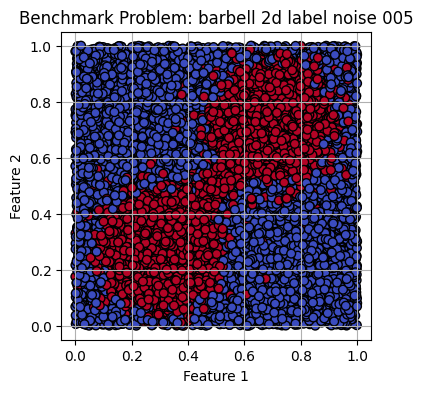

In [3]:
# Plot the dataset
plt.figure(figsize=(4, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f"Benchmark Problem: {dataset_name.replace('_', ' ')}")
plt.grid(True)
plt.show()

# Classification and Regression Trees (CART)

In [4]:
cart_alg = cart.CART(X, y, 0.08)
cart_alg.build_tree()

In [5]:
cart_alg.stats_to_dataframe()

,coverage,density,res dim,mass
box 1,0.040600,0.136476,1,0.1209
box 2,0.052904,0.266089,2,0.0808
box 3,0.229085,0.949032,2,0.0981
box 4,0.014764,0.059701,2,0.1005
box 5,0.165600,0.839152,2,0.0802
box 6,0.033219,0.110837,2,0.1218
box 7,0.123770,0.628750,2,0.0800
box 8,0.238927,0.978831,2,0.0992
box 9,0.046506,0.235367,2,0.0803
box 10,0.054626,0.160637,1,0.1382


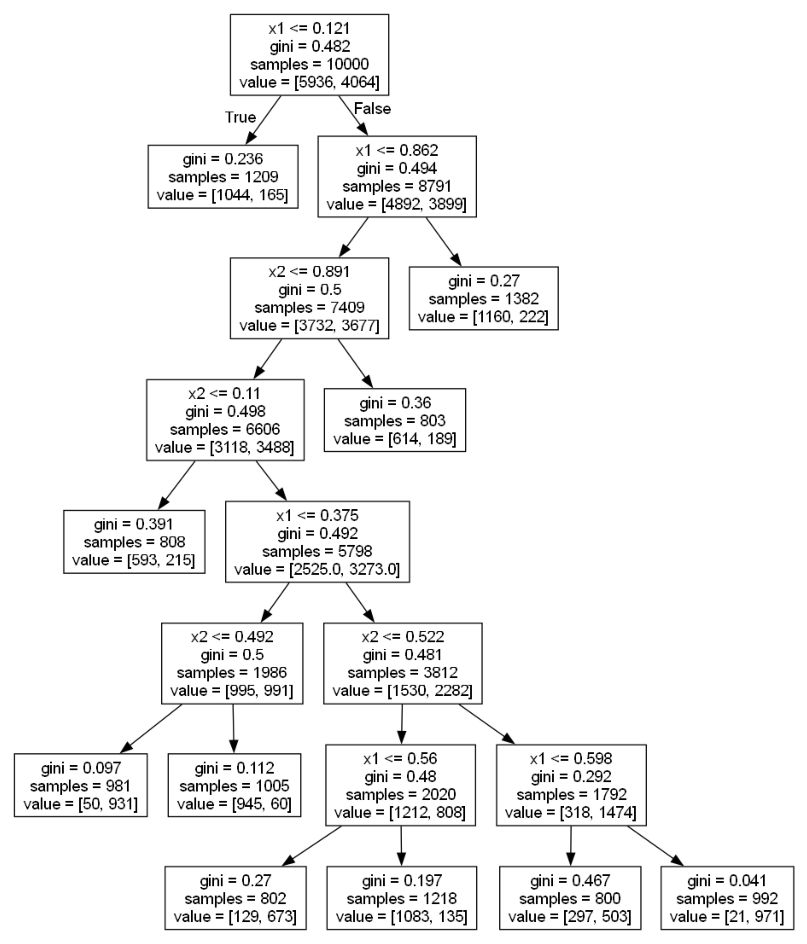

In [6]:
fig = cart_alg.show_tree()
fig.set_size_inches((18, 12))
plt.show()

Figure saved: cart_boxes_on_barbell_2d.pdf


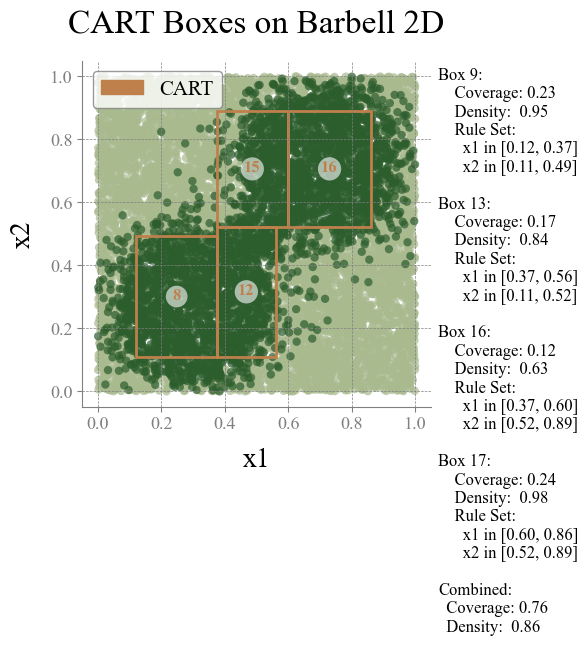

<Axes: title={'center': 'CART Boxes on Barbell 2D'}, xlabel='x1', ylabel='x2'>

In [7]:
# Plot CART boxes
plot_boxes(
    obj=cart_alg,
    X=X,
    y=y,
    title="CART Boxes on Barbell 2D",
    save_path="cart_boxes_on_barbell_2d.pdf"
)